In [29]:
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
df = pd.read_excel(r'C:\Users\abonc\OneDrive\Documents\GitHub\EVCharging\data\EValutateNY\resources.xlsx', sheet_name='Charging Use')

In [53]:
df

,Start Date,ZIP Code,Network,Energy (kWh),Charging Sessions,Charging Time (Hours),Total Duration (Hours),Active Station Count,Active Port Count
0,2021-02-01,14020,EV Connect,26.043,11,19,56,4,4
1,2021-04-01,12308,EV Connect,316.978,49,84,226,10,10
2,2021-04-01,14020,EV Connect,42.911,15,30,69,2,2
3,2021-03-01,12308,EV Connect,846.395,101,224,488,12,12
4,2021-03-01,14020,EV Connect,49.395,19,35,84,3,3
...,...,...,...,...,...,...,...,...,...
11323,2021-02-01,10926,ChargePoint,1.474,1,0,0,1,1
11324,2021-02-01,14120,ChargePoint,0.000,1,0,0,1,1
11325,2021-02-01,13202,ChargePoint,7.555,2,1,1,2,2
11326,2021-01-01,12065,ChargePoint,31.207,9,6,6,1,2


In [54]:
df.describe()

,ZIP Code,Energy (kWh),Charging Sessions,Charging Time (Hours),Total Duration (Hours),Active Station Count,Active Port Count
count,11328.000000,11328.000000,11328.000000,11328.000000,11328.000000,11328.000000,11328.000000
mean,13236.869262,521.510272,51.722722,118.390890,266.923905,2.521893,4.016066
std,7494.743686,848.843391,80.174247,187.085402,537.912118,3.097095,5.121832
min,1851.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,11530.000000,64.273000,7.000000,15.000000,21.000000,1.000000,2.000000
50%,12305.000000,232.630000,23.000000,54.000000,97.000000,1.000000,2.000000
75%,14063.000000,613.603250,61.250000,139.000000,288.000000,3.000000,4.000000
max,98008.000000,12065.979000,852.000000,2449.000000,9870.000000,47.000000,76.000000


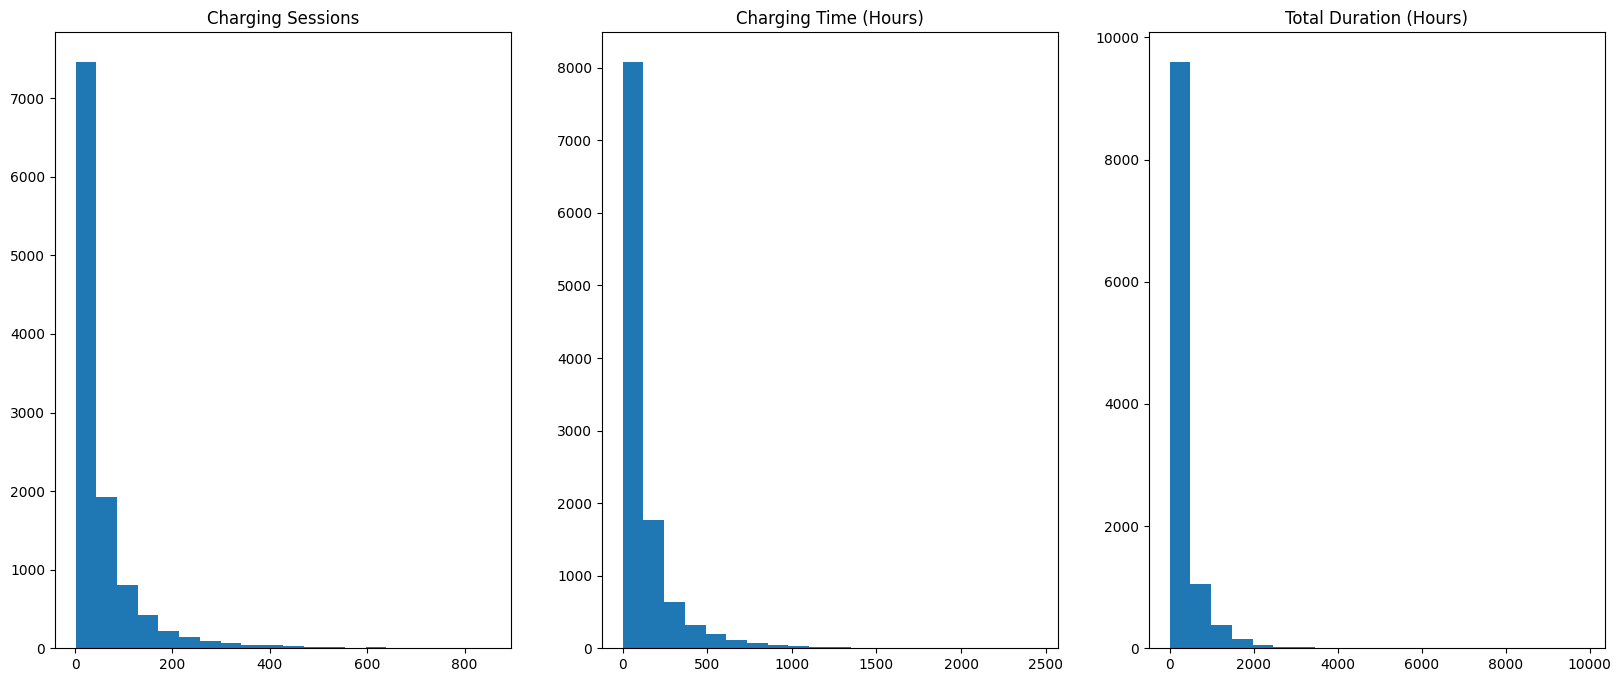

In [66]:
fig, ax = plt.subplots(1,3, figsize=[20,8])

ax[0].hist(df['Charging Sessions'], bins=20)
ax[0].set_title('Charging Sessions')
ax[1].hist(df['Charging Time (Hours)'], bins=20)
ax[1].set_title('Charging Time (Hours)')
ax[2].hist(df['Total Duration (Hours)'], bins=20)
ax[2].set_title('Total Duration (Hours)')

plt.show()


In [26]:
# group data by zip code and sort by ones with the most active number of charging stations
df_zip = df.groupby(by='ZIP Code').mean().sort_values(by='Active Station Count', ascending = False)
df_zip

,Energy (kWh),Charging Sessions,Charging Time (Hours),Total Duration (Hours),Active Station Count,Active Port Count
ZIP Code,,,,,,
12866,2641.639000,376.243243,594.378378,1031.810811,21.459459,34.432432
13323,962.808520,99.680000,251.080000,472.800000,12.520000,12.520000
10940,5514.334333,305.833333,1136.666667,2139.000000,11.666667,22.166667
12065,1324.974630,191.740741,293.777778,489.277778,10.851852,17.592593
10017,925.835125,64.500000,227.375000,1287.750000,10.500000,14.750000
...,...,...,...,...,...,...
2780,31.206333,1.500000,4.833333,5.833333,1.000000,1.000000
12742,441.718000,31.590909,100.590909,198.681818,1.000000,1.000000
12812,67.942906,7.031250,13.375000,17.218750,1.000000,1.000000


In [39]:
df = df.copy()
df['Idle Time (Hours)'] = df['Total Duration (Hours)']-df['Charging Time (Hours)']
df['Avg Charge Time per Session'] = df['Charging Time (Hours)']/df['Charging Sessions']
df

,Start Date,ZIP Code,Network,Energy (kWh),Charging Sessions,Charging Time (Hours),Total Duration (Hours),Active Station Count,Active Port Count,Idle Time (Hours),Charge per Session,Avg Charge Time per Session
0,2021-02-01,14020,EV Connect,26.043,11,19,56,4,4,37,1.727273,1.727273
1,2021-04-01,12308,EV Connect,316.978,49,84,226,10,10,142,1.714286,1.714286
2,2021-04-01,14020,EV Connect,42.911,15,30,69,2,2,39,2.000000,2.000000
3,2021-03-01,12308,EV Connect,846.395,101,224,488,12,12,264,2.217822,2.217822
4,2021-03-01,14020,EV Connect,49.395,19,35,84,3,3,49,1.842105,1.842105
...,...,...,...,...,...,...,...,...,...,...,...,...
11323,2021-02-01,10926,ChargePoint,1.474,1,0,0,1,1,0,0.000000,0.000000
11324,2021-02-01,14120,ChargePoint,0.000,1,0,0,1,1,0,0.000000,0.000000
11325,2021-02-01,13202,ChargePoint,7.555,2,1,1,2,2,0,0.500000,0.500000
11326,2021-01-01,12065,ChargePoint,31.207,9,6,6,1,2,0,0.666667,0.666667


In [40]:
df_date = df.groupby(by='Start Date').sum()
df_date

,ZIP Code,Energy (kWh),Charging Sessions,Charging Time (Hours),Total Duration (Hours),Active Station Count,Active Port Count,Idle Time (Hours),Charge per Session,Avg Charge Time per Session
Start Date,,,,,,,,,,
2010-12-01,10577,0.000,15,0,0,2,3,0,0.000000,0.000000
2011-01-01,10577,0.000,2,0,0,1,2,0,0.000000,0.000000
2011-03-01,10577,0.000,2,0,0,2,2,0,0.000000,0.000000
2011-06-01,10577,0.000,2,0,0,2,2,0,0.000000,0.000000
2011-08-01,10577,0.000,1,0,0,1,1,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-05-01,4625012,200109.104,18018,40684,84727,1062,1639,44043,769.008407,769.008407
2021-06-01,5182611,231912.455,20348,47660,94695,1157,1772,47035,818.245524,818.245524
2021-07-01,5252895,257636.807,22253,52652,104006,1189,1853,51354,867.688894,867.688894


Text(0, 0.5, 'Hours')

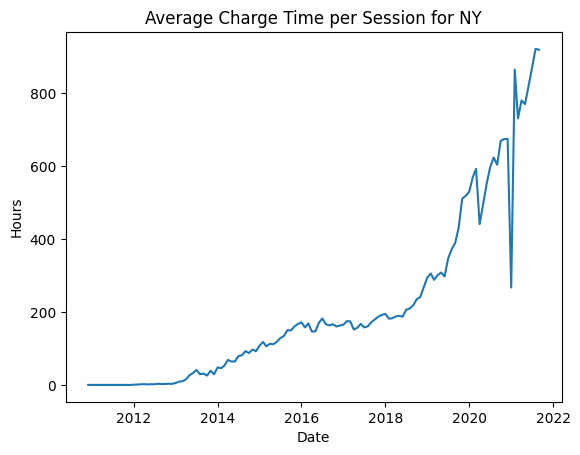

In [43]:
plt.plot(df_date.index, df_date['Avg Charge Time per Session'])
plt.title('Average Charge Time per Session for NY')
plt.xlabel('Date')
plt.ylabel('Hours')

Text(0, 0.5, 'Hours')

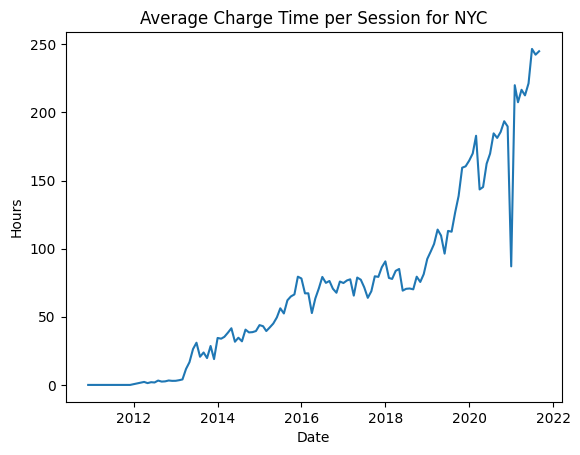

In [49]:
# looking at only NYC zip codes

NYC_zip_max = 11697
NYC_zip_min = 10001
df_NYC = df[(df['ZIP Code']>NYC_zip_min) & (df['ZIP Code']<NYC_zip_max)]

# groupby date
df_NYC = df_NYC.groupby(by='Start Date').sum()

plt.plot(df_NYC.index, df_NYC['Avg Charge Time per Session'])
plt.title('Average Charge Time per Session for NYC')
plt.xlabel('Date')
plt.ylabel('Hours')
